In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error



In [2]:
diabetes = load_diabetes()
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [19]:
pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
df_x = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names).values
df_x,df_x.shape

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 (442, 10))

In [5]:
df_y = diabetes.target #당뇨 수치
df_y, df_y.shape

(array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
         83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
        104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
        173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
        107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
         60., 174., 259., 178., 128., 

In [6]:
#데이터 스플릿, val도?
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [29]:
#feature count == len(W)
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [9]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [10]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산 dot : 행렬의 곱
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [11]:
dW, db = gradient(df_x, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [ -60.44094545  -13.63007154 -189.43335416 -142.47284307  -68.24629466
  -55.9977415   127.5624345  -138.93623614 -182.71668831 -123.42387322]
db: -303.70133306052327


In [16]:
LEARNING_RATE =0.005
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3655.2878
Iteration 20 : Loss 3635.8188
Iteration 30 : Loss 3617.2261
Iteration 40 : Loss 3599.4381
Iteration 50 : Loss 3582.3925
Iteration 60 : Loss 3566.0341
Iteration 70 : Loss 3550.3144
Iteration 80 : Loss 3535.1902
Iteration 90 : Loss 3520.6227
Iteration 100 : Loss 3506.5773
Iteration 110 : Loss 3493.0228
Iteration 120 : Loss 3479.9308
Iteration 130 : Loss 3467.2754
Iteration 140 : Loss 3455.0331
Iteration 150 : Loss 3443.1823
Iteration 160 : Loss 3431.7031
Iteration 170 : Loss 3420.5772
Iteration 180 : Loss 3409.7874
Iteration 190 : Loss 3399.3180
Iteration 200 : Loss 3389.1544
Iteration 210 : Loss 3379.2827
Iteration 220 : Loss 3369.6901
Iteration 230 : Loss 3360.3646
Iteration 240 : Loss 3351.2950
Iteration 250 : Loss 3342.4705
Iteration 260 : Loss 3333.8813
Iteration 270 : Loss 3325.5179
Iteration 280 : Loss 3317.3714
Iteration 290 : Loss 3309.4334
Iteration 300 : Loss 3301.6961
Iteration 310 : Loss 3294.1518
Iteration 320 : Loss 3286.7935
Iteration 330 : L

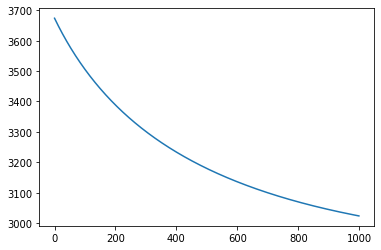

In [17]:
plt.plot(losses)
plt.show()

In [18]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2885.1170816949

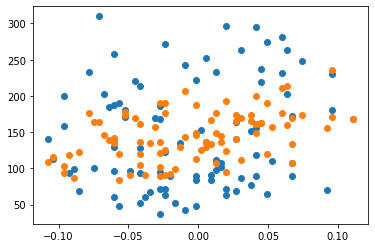

In [15]:
#정답률 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()